# Data Mining: Predictive Analysis 

### Brief idea, we are going after
- First step to any data science project is to collect data 
- Second step is to read this data into valid format as per our tool
- Now, it is time to choose a model 
- Generate this model with help of libraries like sklearn, tensorflow, and keras
- Test the model 
- Predict the result 

### Extension of the idea
- Map the results with temperature and predict how CO2 emissions can affect the temperature

In [1]:
# importing pandas library
import pandas as pd

In [2]:
# reading csv file using pandas
emission_data = pd.read_csv("./data/GHG_Econ_Can_Prov_Terr.csv")

In [3]:
# displaying the data
emission_data

,Year,Region,Index,Source,Sector,Sub-sector,Sub-sub-sector,Total,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,NaN,NaN,NaN,y,173.0523683,Mt
1,1990,Alberta,1,Oil and Gas,NaN,NaN,NaN,y,67.57525298,Mt
2,1990,Alberta,2,Oil and Gas,Upstream Oil and Gas,NaN,NaN,y,63.93934941,Mt
3,1990,Alberta,3,Oil and Gas,Upstream Oil and Gas,Natural Gas Production and Processing,NaN,NaN,29.09710967,Mt
4,1990,Alberta,4,Oil and Gas,Upstream Oil and Gas,Conventional Oil Production,NaN,y,15.97307867,Mt
...,...,...,...,...,...,...,...,...,...,...
16245,2018,Yukon,42,Waste,Wastewater,NaN,NaN,NaN,0.005361202,Mt
16246,2018,Yukon,45,"Light Manufacturing, Construction & Forest Res...",NaN,NaN,NaN,y,0.019400921,Mt
16247,2018,Yukon,46,"Light Manufacturing, Construction & Forest Res...",Light Manufacturing,NaN,NaN,NaN,0.01757176,Mt
16248,2018,Yukon,47,"Light Manufacturing, Construction & Forest Res...",Construction,NaN,NaN,NaN,0.001490394,Mt


In [4]:
# printing columns that matter
emission_data[['Region','CO2eq', 'Year']]

,Region,CO2eq,Year
0,Alberta,173.0523683,1990
1,Alberta,67.57525298,1990
2,Alberta,63.93934941,1990
3,Alberta,29.09710967,1990
4,Alberta,15.97307867,1990
...,...,...,...
16245,Yukon,0.005361202,2018
16246,Yukon,0.019400921,2018
16247,Yukon,0.01757176,2018
16248,Yukon,0.001490394,2018


### Filtering the data 
essentially, the dataset is pretty huge and we require only few rows
the data is also, pretty huge for our project
also, data is divided into sub-cateogories and hence, we need to merge them

In [5]:
# data about only ontario 
data_ontario = emission_data[emission_data['Region'] == "Ontario"]

# getting only required data
data_ontario = data_ontario[['Year', 'CO2eq']]

# but first we have to convert the data to float because, it will be read as string
data_ontario['CO2eq'] = [float(i) for i in data_ontario['CO2eq']]

# grouping data by year (i.e. removing all the unnecessary sub parts in the data)
data_ontario = data_ontario.groupby(['Year'], as_index = False).sum()

# let's limit the data to 2 decimal places to make the calculations easier
data_ontario['CO2eq'] = [float("{:.2f}".format(i)) for i in data_ontario['CO2eq']]

# this is how we wanted our data to be
data_ontario

,Year,CO2eq
0,1990,556.22
1,1991,549.91
2,1992,561.24
3,1993,541.90
4,1994,550.43
5,1995,563.84
6,1996,590.13
7,1997,601.57
8,1998,597.93
9,1999,613.41


### Visualize data
- it is better to visualize the data before, we proceed 
- before we even built a model, we can see some insights from the data by just visualization
- for this, we will use matplot library, because it is good and I know it

In [6]:
# we have to import this bad boy 
import matplotlib.pyplot as plt 

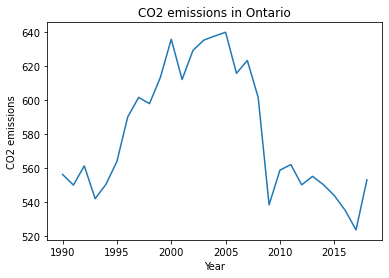

In [7]:
# plot the graph
plt.plot(data_ontario['Year'], data_ontario['CO2eq'])
plt.title("CO2 emissions in Ontario")
plt.ylabel("CO2 emissions")
plt.xlabel("Year")
plt.show()

### Weather data of windsor

In [50]:
# reading csv file using pandas
climate_data = pd.read_csv("./data/climate_monthly.csv")

In [51]:
# displaying the data
climate_data

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-82.96,42.28,WINDSOR A,6139525,1940-01,1940,1,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,-82.96,42.28,WINDSOR A,6139525,1940-02,1940,2,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,-82.96,42.28,WINDSOR A,6139525,1940-03,1940,3,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,-82.96,42.28,WINDSOR A,6139525,1940-04,1940,4,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
4,-82.96,42.28,WINDSOR A,6139525,1940-05,1940,5,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-82.96,42.28,WINDSOR A,6139525,2014-06,2014,6,26.5,NaN,16.2,...,0.0,NaN,111.4,NaN,0.0,NaN,20.0,I,63.0,I
894,-82.96,42.28,WINDSOR A,6139525,2014-07,2014,7,25.8,NaN,15.4,...,0.0,NaN,86.0,NaN,0.0,NaN,33.0,I,69.0,I
895,-82.96,42.28,WINDSOR A,6139525,2014-08,2014,8,25.9,NaN,15.9,...,0.0,NaN,132.2,NaN,0.0,NaN,26.0,I,100.0,I
896,-82.96,42.28,WINDSOR A,6139525,2014-09,2014,9,22.2,NaN,10.6,...,0.0,NaN,135.0,NaN,0.0,NaN,27.0,I,96.0,I


In [54]:
climate_data['Year'] = [ int(i) for i in climate_data['Year'] ]
climate_data = climate_data[ climate_data['Year'] >= 1990 ]
climate_data

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
600,-82.96,42.28,WINDSOR A,6139525,1990-01,1990,1,3.9,NaN,-2.3,...,12.2,NaN,52.8,NaN,0.0,NaN,22.0,NaN,104.0,NaN
601,-82.96,42.28,WINDSOR A,6139525,1990-02,1990,2,2.7,NaN,-4.7,...,32.6,NaN,153.0,NaN,2.0,NaN,32.0,NaN,83.0,NaN
602,-82.96,42.28,WINDSOR A,6139525,1990-03,1990,3,7.9,NaN,-0.3,...,16.6,NaN,50.4,NaN,0.0,NaN,24.0,NaN,69.0,NaN
603,-82.96,42.28,WINDSOR A,6139525,1990-04,1990,4,14.8,NaN,4.0,...,12.0,NaN,70.8,NaN,0.0,NaN,30.0,NaN,65.0,NaN
604,-82.96,42.28,WINDSOR A,6139525,1990-05,1990,5,18.4,NaN,8.5,...,0.0,T,117.4,NaN,0.0,NaN,23.0,NaN,81.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-82.96,42.28,WINDSOR A,6139525,2014-06,2014,6,26.5,NaN,16.2,...,0.0,NaN,111.4,NaN,0.0,NaN,20.0,I,63.0,I
894,-82.96,42.28,WINDSOR A,6139525,2014-07,2014,7,25.8,NaN,15.4,...,0.0,NaN,86.0,NaN,0.0,NaN,33.0,I,69.0,I
895,-82.96,42.28,WINDSOR A,6139525,2014-08,2014,8,25.9,NaN,15.9,...,0.0,NaN,132.2,NaN,0.0,NaN,26.0,I,100.0,I
896,-82.96,42.28,WINDSOR A,6139525,2014-09,2014,9,22.2,NaN,10.6,...,0.0,NaN,135.0,NaN,0.0,NaN,27.0,I,96.0,I


### Change in temperature in terms of

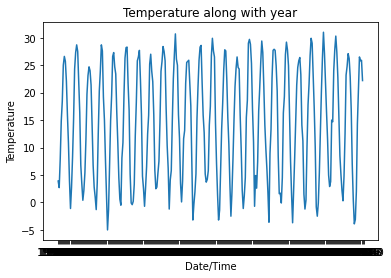

In [55]:
# plot the graph
plt.plot(climate_data['Date/Time'], climate_data['Mean Max Temp (°C)'])
plt.title("Temperature along with year")
plt.ylabel("Temperature")
plt.xlabel("Date/Time")
plt.show()